In [1]:
import pandas as pd

train_df = pd.read_csv("./data/rainfall_train.csv")
test_df = pd.read_csv("./data/rainfall_test.csv")

train_df = train_df.drop(columns=['Unnamed: 0', 'rainfall_train.fc_year', 'rainfall_train.fc_month',
       'rainfall_train.fc_day', 'rainfall_train.fc_hour'])
test_df = test_df.drop(columns=['Unnamed: 0', 'rainfall_test.fc_year', 'rainfall_test.fc_month',
       'rainfall_test.fc_day', 'rainfall_test.fc_hour'])

## 학습/테스트 데이터 시간/공간적 범위 분석

### 시간적 범위 분석

**년도(rainfall_ef_year)**

In [2]:
train_df["rainfall_train.ef_year"].unique()

array(['A', 'B', 'C'], dtype=object)

In [3]:
test_df["rainfall_test.ef_year"].unique()

array(['D'], dtype=object)

### 공간적 범위 분석


**지점(rainfall_train.stn4contest)**

In [4]:
train_df["rainfall_train.stn4contest"].unique()

array(['STN001', 'STN002', 'STN003', 'STN004', 'STN005', 'STN006',
       'STN007', 'STN008', 'STN009', 'STN010', 'STN011', 'STN012',
       'STN013', 'STN014', 'STN015', 'STN016', 'STN017', 'STN018',
       'STN019', 'STN020'], dtype=object)

In [5]:
test_df["rainfall_test.stn4contest"].unique()

array(['STN031', 'STN032', 'STN033', 'STN034', 'STN035'], dtype=object)

## 년도/지점이 주는 영향도 분석


### 지점별 실 강수량 평균값


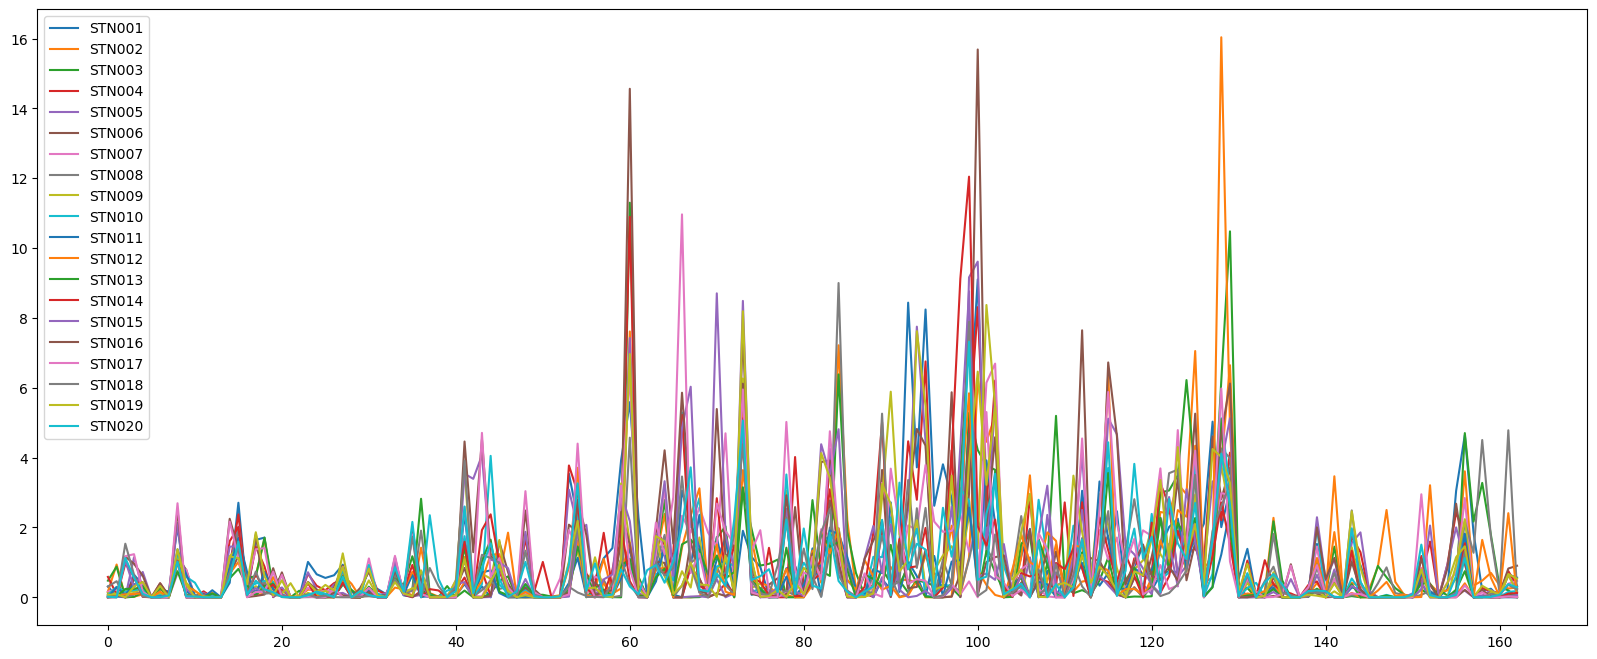

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
train_df = train_df[~(train_df["rainfall_train.vv"] == -999)]
for stn in train_df["rainfall_train.stn4contest"].unique():
    plt.plot(train_df[train_df["rainfall_train.stn4contest"] == stn].groupby(["rainfall_train.ef_month","rainfall_train.ef_day"])["rainfall_train.vv"].mean().reset_index()["rainfall_train.vv"],label=stn)
plt.legend()

### 년도별 실강수량 평균값

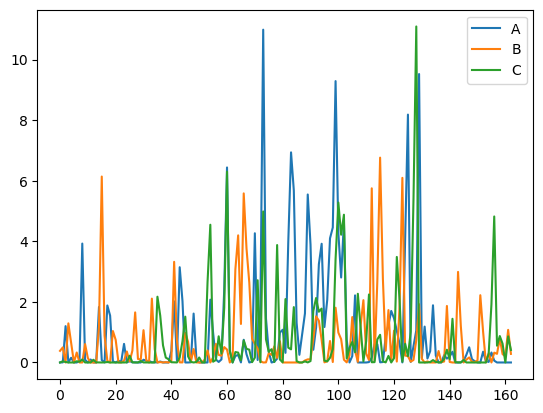

In [7]:
for y in train_df["rainfall_train.ef_year"].unique():
    plt.plot(train_df[train_df["rainfall_train.ef_year"] == y].groupby(["rainfall_train.ef_month","rainfall_train.ef_day"])["rainfall_train.vv"].mean().reset_index()["rainfall_train.vv"],label=y)
plt.legend()

## 클래스 계급별 데이터 분포

### 전체 계급별 데이터 분포

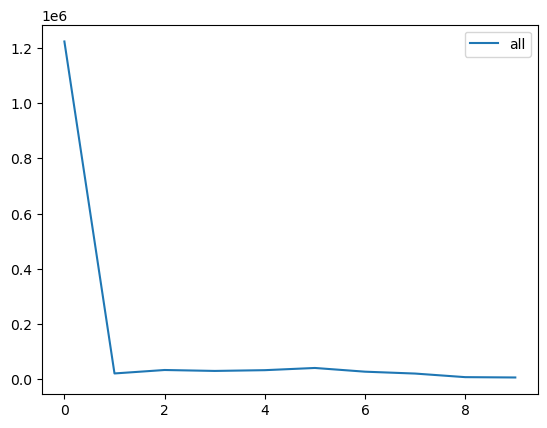

In [64]:
plt.plot(train_df.groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True), label="all")
plt.legend()

In [ ]:
plt.plot(train_df.groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True), label="전체데이터")

### 년도별 강수계급 데이터 분포 

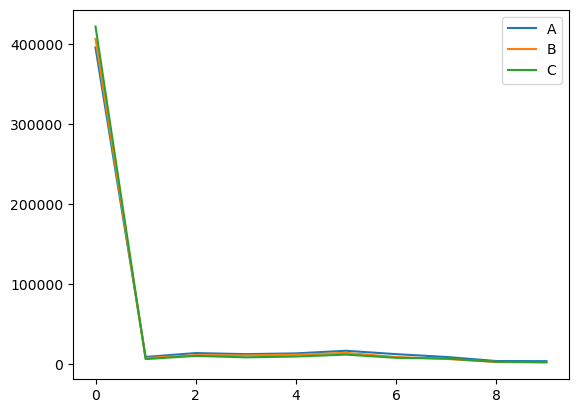

In [ ]:
tmp_data = pd.concat([train_df[train_df["rainfall_train.ef_year"] == "A"].groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True),train_df[train_df["rainfall_train.ef_year"] == "B"].groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True),train_df[train_df["rainfall_train.ef_year"] == "C"].groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True)],axis=1)
tmp_data.columns = ["A","B","C"]

for i in tmp_data.columns:
    plt.plot(tmp_data[i],label=i)
plt.legend()


### 지점별 강수 계급 데이터 분포

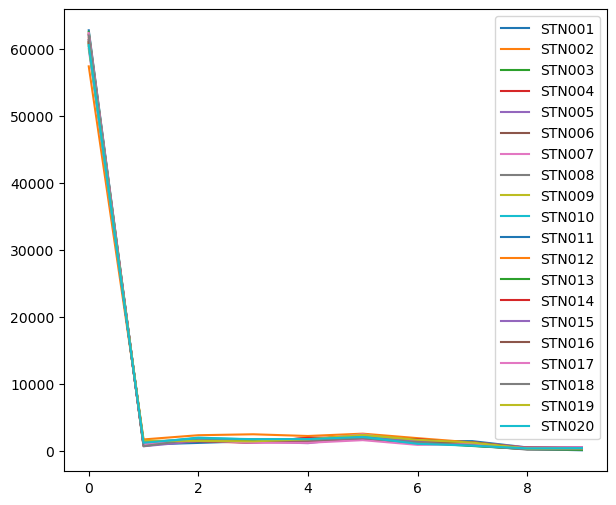

In [60]:
plt.figure(figsize=(7,6))

stn_data = pd.DataFrame()
for stn in train_df["rainfall_train.stn4contest"].unique():
    stn_data = pd.concat([stn_data, train_df[train_df["rainfall_train.stn4contest"] == stn].groupby(by="rainfall_train.class_interval")[["rainfall_train.class_interval"]].count().reset_index(drop=True)],axis=1)
stn_data.columns = [i for i in train_df["rainfall_train.stn4contest"].unique()]

for stn in stn_data.columns:
    plt.plot(stn_data[stn], label=stn)
plt.legend()


**각각의 확률분포에 따라서 강수량 수치 계산: 각 계급별 중간 값 * 확률변수**
- 'rainfall_train.v01' : 0.1 -0.2  (mm)
- 'rainfall_train.v02' : 0.2 -0.5  (mm)
- 'rainfall_train.v03' : 0.5 -1.0  (mm)
- 'rainfall_train.v04' : 1.0 -2.0  (mm)
- 'rainfall_train.v05' : 2.0 -5.0  (mm)
- 'rainfall_train.v06' : 5.0 -10.0 (mm)
- 'rainfall_train.v07' : 10.0-20.0 (mm)
- 'rainfall_train.v08' : 20.0-30.0 (mm)
- 'rainfall_train.v09' : 30.0      (mm)

각각의 계급별 중간 값에 따라